# Análise de Dados de Excel com Python e Pandas

## Diego Brito

In [2]:
import pandas as pd

In [3]:
url1 = 'https://github.com/diegoasb/analise_dados_python/blob/master/Aracaju.xlsx?raw=true'
url2 = 'https://github.com/diegoasb/analise_dados_python/blob/master/Fortaleza.xlsx?raw=true'
url3 = 'https://github.com/diegoasb/analise_dados_python/blob/master/Natal.xlsx?raw=true'
url4 = 'https://github.com/diegoasb/analise_dados_python/blob/master/Recife.xlsx?raw=true'
url5 = 'https://github.com/diegoasb/analise_dados_python/blob/master/Salvador.xlsx?raw=true'

In [4]:
df1 = pd.read_excel(url1)
df2 = pd.read_excel(url2)
df3 = pd.read_excel(url3)
df4 = pd.read_excel(url4)
df5 = pd.read_excel(url5)

In [5]:
# unindo todos os arquivos de dados
df = pd.concat([df1,df2,df3,df4,df5])

In [6]:
# observando as primeiras linhas de dados
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [7]:
# observando as ultimas linhas de dados
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [8]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [9]:
# alterando o tipo de dados de uma coluna
df['LojaID'] = df['LojaID'].astype('object')

In [10]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

## Verificação de valores nulos

In [11]:
# verificação de valores nulos em cada coluna e caso houver valores nulos, trazer a soma de quantos valores nulos foram encontrados
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

Caso houvesse valores nulos, poderia ser utilizado um código para substituir os valores nulos pela média, por exemplo, se na coluna Vendas houvesse valores nulos:

In [12]:
# df['Vendas'].fillna(df['Vendas'].mean(), inplace=True
# substituiria os valores nulos pela media total de vendas, o inplace=True serve para mudar os valores permanentemente

In [13]:
# df['Vendas'].fillna(0, inplace=True
# substituiria os valores nulos por 0

In [14]:
# df.dropna(inplace=True)
# apagaria as linhas com valores nulos

In [15]:
# df.dropna(subset=['Vendas'], inplace=True)
# apagaria as linhas com valores nulos apenas na coluna de Vendas

In [16]:
# df.dropna(how='all', inplace=True)
# apagaria as linhas onde todas as colunas apresentassem valores nulos

## Criando novas colunas

In [17]:
# Criando uma coluna para receita, que seria as vendas x quantidade
df['Receita'] = df['Vendas'].mul(df['Qtde'])

In [18]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [19]:
# Retornando a maior receita
df['Receita'].max()

3544.0

In [20]:
# Retornando a menor receita
df['Receita'].min()

3.34

In [21]:
# Vendo onde se encontram o top3 da receita
df.nlargest(3,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
51,Natal,2018-01-21,859.0,852,4,3436.0
55,Natal,2019-01-08,859.0,854,4,3436.0


In [22]:
# Onde se encontram as 5 piores receitas
df.nsmallest(5,'Receita')

,Cidade,Data,Vendas,LojaID,Qtde,Receita
118,Aracaju,2018-01-01,3.34,1522,1,3.34
65,Recife,2019-01-01,4.01,981,1,4.01
92,Natal,2019-01-02,4.57,1035,1,4.57
92,Salvador,2019-01-01,4.57,1035,1,4.57
95,Natal,2019-01-02,5.13,1035,1,5.13


In [23]:
# Agrupamento da receita por cidade
df.groupby('Cidade')['Receita'].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [24]:
# Ordenando o conjunto de dados pela receita decrescente
df.sort_values('Receita', ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita
7,Natal,2019-03-18,886.0,853,4,3544.0
55,Natal,2019-01-08,859.0,854,4,3436.0
51,Natal,2018-01-21,859.0,852,4,3436.0
30,Natal,2018-10-02,856.0,853,4,3424.0
41,Natal,2018-05-20,835.0,852,4,3340.0
38,Natal,2018-02-25,828.0,852,4,3312.0
10,Natal,2018-10-27,828.0,852,4,3312.0
69,Natal,2019-03-24,817.0,852,4,3268.0
62,Natal,2018-02-10,793.0,854,4,3172.0
52,Natal,2018-04-27,778.0,854,4,3112.0


## Trabalhando com datas

A coluna de datas já está no formato correto, então para introdução, levaremos para o formato incorreto, o que normalmente acontece na realidade. 

In [25]:
df['Data'] = df['Data'].astype('int64')

In [26]:
df.dtypes

Cidade      object
Data         int64
Vendas     float64
LojaID      object
Qtde         int64
Receita    float64
dtype: object

In [27]:
# Transformando a coluna de data em data
df['Data'] = pd.to_datetime(df['Data'])

In [28]:
df.dtypes

Cidade             object
Data       datetime64[ns]
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
dtype: object

In [29]:
# agrupamento das receitas por ano
df.groupby(df['Data'].dt.year)['Receita'].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [30]:
# criando uma coluna
df['Ano Venda'] = df['Data'].dt.year

In [31]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda
186,Salvador,2019-01-02,169.09,1036,2,338.18,2019
91,Natal,2019-01-02,17.74,1035,1,17.74,2019
84,Salvador,2019-01-01,22.99,1036,1,22.99,2019
137,Natal,2019-01-02,51.66,1036,3,154.98,2019
214,Salvador,2019-01-02,54.94,1036,2,109.88,2019


In [32]:
# extraindo o mês e o dia da venda
df['mes_venda'], df['dia_venda'] = (df['Data'].dt.month, df['Data'].dt.day)

In [33]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia_venda
33,Natal,2018-01-11,759.00,854,2,1518.00,2018,1,11
84,Fortaleza,2019-01-01,147.46,1003,6,884.76,2019,1,1
93,Natal,2019-01-02,15.58,1037,1,15.58,2019,1,2
60,Fortaleza,2019-01-01,182.14,1002,4,728.56,2019,1,1
198,Natal,2019-01-02,13.65,1037,3,40.95,2019,1,2


In [34]:
# retornando a data mais antiga
df['Data'].min()

Timestamp('2018-01-01 00:00:00')

In [35]:
# diferença de dias (se tivessemos duas colunas de datas, poderiamos fazer essa diferença, porem como nao tem ele pega a data e substraira da data minima)
df['diferenca_dias'] = df['Data'] - df['Data'].min()

In [36]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia_venda,diferenca_dias
223,Natal,2019-01-02,40.51,1037,2,81.02,2019,1,2,366 days
40,Recife,2019-02-13,36.22,983,6,217.32,2019,2,13,408 days
70,Aracaju,2018-01-01,8.44,1523,9,75.96,2018,1,1,0 days
74,Aracaju,2018-01-01,7.86,1520,2,15.72,2018,1,1,0 days
164,Natal,2019-01-02,6.59,1035,1,6.59,2019,1,2,366 days


In [37]:
# criando uma coluna trimestral
df['trimestre_venda'] = df['Data'].dt.quarter

In [38]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
130,Salvador,2019-03-02,59.78,1036,1,59.78,2019,3,2,425 days,1
61,Natal,2018-09-11,724.00,853,2,1448.00,2018,9,11,253 days,3
129,Recife,2019-03-02,35.34,982,7,247.38,2019,3,2,425 days,1
38,Aracaju,2018-01-01,142.46,1520,1,142.46,2018,1,1,0 days,1
63,Recife,2019-01-01,37.95,980,2,75.90,2019,1,1,365 days,1


In [39]:
# filtrando as vendas de fevereiro de 2019
vendas_fevereiro_2019 = df.loc[(df['Data'].dt.year == 2019) & (df['Data'].dt.month == 2)]

In [40]:
vendas_fevereiro_2019

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Ano Venda,mes_venda,dia_venda,diferenca_dias,trimestre_venda
2,Fortaleza,2019-02-10,35.33,1004,3,105.99,2019,2,10,405 days,1
3,Fortaleza,2019-02-10,20.95,1004,6,125.70,2019,2,10,405 days,1
7,Fortaleza,2019-02-11,35.50,1003,2,71.00,2019,2,11,406 days,1
8,Fortaleza,2019-02-11,37.49,1005,1,37.49,2019,2,11,406 days,1
13,Fortaleza,2019-02-12,118.58,1003,4,474.32,2019,2,12,407 days,1
40,Fortaleza,2019-02-13,19.13,1002,4,76.52,2019,2,13,408 days,1
41,Fortaleza,2019-02-13,191.29,1002,3,573.87,2019,2,13,408 days,1
11,Natal,2019-02-09,564.00,853,3,1692.00,2019,2,9,404 days,1
12,Natal,2019-02-02,709.00,853,3,2127.00,2019,2,2,397 days,1
21,Natal,2019-02-08,679.00,853,2,1358.00,2019,2,8,403 days,1


## Visualização de dados

In [41]:
# Mostrara quantas vezes cada valor aparece na coluna
df['LojaID'].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1002     30
1005     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

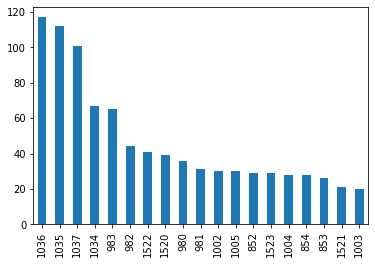

In [43]:
# gráfico de barras
df['LojaID'].value_counts(ascending=False).plot.bar()

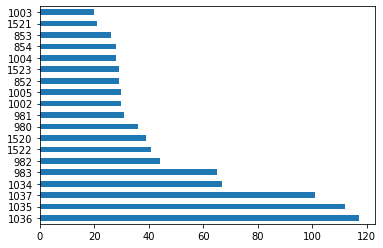

In [44]:
# gráficos de barras horizontais
df['LojaID'].value_counts().plot.barh()

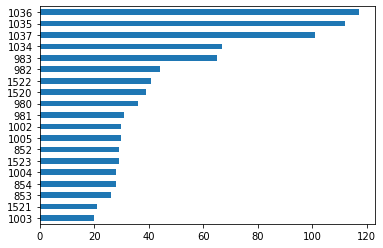

In [46]:
# o pontos em vírgula no final tira a linha emc ima do gráfico
df['LojaID'].value_counts(ascending=True).plot.barh();

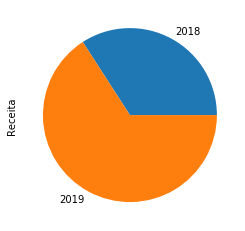

In [47]:
# gráfico de pizza
df.groupby(df['Data'].dt.year)['Receita'].sum().plot.pie()

In [48]:
# total de vendas por cidade
df['Cidade'].value_counts()

Natal        240
Salvador     240
Recife       142
Fortaleza    142
Aracaju      130
Name: Cidade, dtype: int64

In [49]:
import matplotlib.pyplot as plt

In [ ]:
# adicionando titulo e nome dos eixos

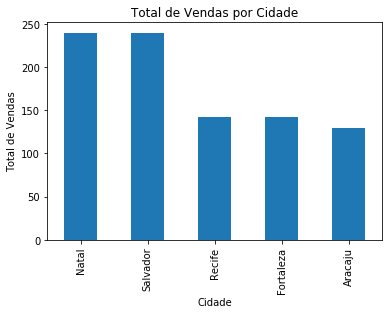

In [52]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade')
plt.xlabel('Cidade')
plt.ylabel("Total de Vendas");

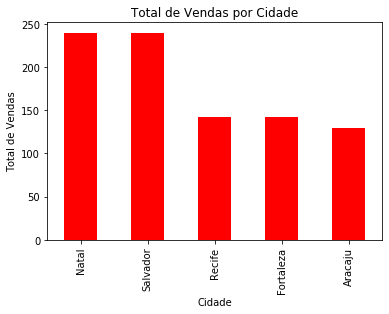

In [53]:
# alterando a cor
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel("Total de Vendas");

In [54]:
# mudança de estilo
plt.style.use('ggplot')

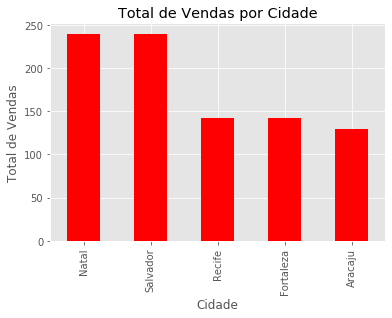

In [55]:
df['Cidade'].value_counts().plot.bar(title='Total de Vendas por Cidade', color='red')
plt.xlabel('Cidade')
plt.ylabel("Total de Vendas");

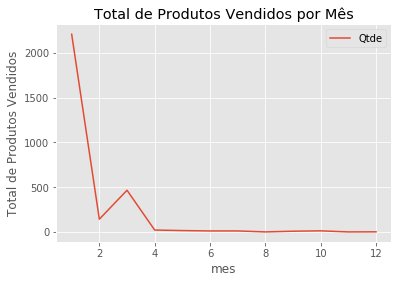

In [58]:
df.groupby(df['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês')
plt.xlabel('mes')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

In [59]:
df_2019 = df[df['Ano Venda'] == 2019]

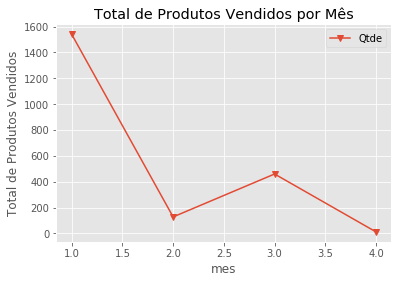

In [60]:
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês', marker ='o')
plt.xlabel('mes')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();

(array([191., 193., 221.,  85.,  54.,  61.,  38.,  31.,  14.,   6.]),
 array([ 1. ,  1.9,  2.8,  3.7,  4.6,  5.5,  6.4,  7.3,  8.2,  9.1, 10. ]),
 <a list of 10 Patch objects>)

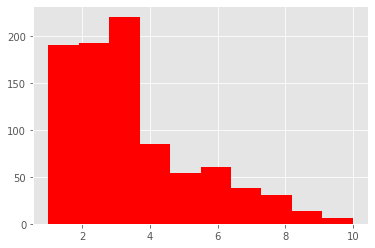

In [66]:
# Histograma
plt.hist(df['Qtde'], color='red')

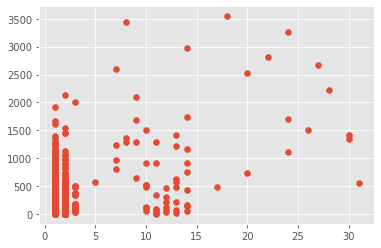

In [69]:
# gráfico de dispersão
plt.scatter(x=df_2019['dia_venda'],y=df_2019['Receita']);

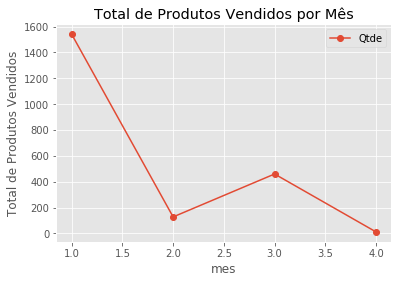

In [70]:
# Salvando em PNG
df_2019.groupby(df_2019['mes_venda'])['Qtde'].sum().plot(title='Total de Produtos Vendidos por Mês', marker ='o')
plt.xlabel('mes')
plt.ylabel('Total de Produtos Vendidos')
plt.legend();
plt.savefig('Total de Produtos Vendidos por Mês.png')